# WeatherPy Data Analysis 
#### Objective: Visualize the weather of 500+ cities across the world of varying distance from the equator to illustrate what the weather is like as we approach the equator. 
## Observed Trends 
* As we approach the equator, temperatures increase. Fig 1 shows temperatures at the equator concentrated around 70-85 degrees F. Similarly, temperatures start to gradually drop as we move further and further away from the equator (Fig 1).
* Although the list of cities was randomly generated, all the figures show cities concentrated in the Northern Hemisphere as expected, since the southern hemisphere has fewer cities. 
* Figures 2, 3, and 4 show more scatter and no strong correlation between distance from equator and humidity, clouds, or wind. 

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import time
import datetime
from citipy import citipy
import random
from config import openweather_api_key
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Generate Cities List

In [2]:
# Create empty df to store city data 
city_df = pd.DataFrame()
# Create empty lists to store coordinates 
lat = []
long = []
# Loop to generate random coordinates 
for x in range(0,2500):
    lat.append(random.uniform(-90,90))
    long.append(random.uniform(-180, 180))
# Add generated coordinates to previously created df     
city_df["Lat"] = lat
city_df["Long"] = long
#city_df
#city_df.count()

# Find cities corresponding to coordinates
# Create empty list to store city names 
cities = []
# Loop to append city names 
for index, row in city_df.iterrows():
    city=citipy.nearest_city(row["Lat"],row["Long"])
    cities.append(city.city_name)

# Add city names to previously created df   
city_df['City'] = cities
#check length to confirm 
# print(len(city_df))
# Remove duplicates 
city_df2 = city_df.drop_duplicates("City",keep="first")
# Confirm at least 500 unique (non-repeat) cities in df 
# city_df2.count()

# Perform API Calls and Print Log

In [3]:
# Create empty lists for weather data 
temp = []
humidity = []
clouds = []
wind = []
counter = 0
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Iterate through the rows to pull data from API; 
# Print log of each city as it's being processed with the city number, city name, and requested URL.
start = time.time()
print("---------------Beginning Data Retrieval---------------")
print("                                                      ")
try:
    for index, row in city_df2.iterrows():
        counter +=1
        city = row["City"]
        query_url = url+"lat="+str(row["Lat"])+"&lon="+str(row["Long"])+"&appid="+openweather_api_key+"&units="+units
        print("Now retrieving city number "+str(counter)+": city name => "+row["City"])
        print("Requested URL: "+query_url)
        print("---------------------------------------------------------------------------------------------------------------")
        weather_response = req.get(query_url).json()
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        time.sleep(1)
except:
    pass
end = time.time()
print("---------------Data Retrieval Complete----------------")
print("                                                      ")
print("                                                      ")
run_time = round(end-start,0)
run_time_str = str(datetime.timedelta(seconds=(run_time)))
print("------------------------------------------------------")
print("Total Time Elapsed for Loop Completion = "+run_time_str)
print("------------------------------------------------------")
print("                                                      ")

---------------Beginning Data Retrieval---------------
                                                      
Now retrieving city number 1: city name => nanortalik
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=61.05878779164627&lon=-40.211975313663004&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 2: city name => illoqqortoormiut
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=73.8382144986787&lon=-18.439735977542313&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 3: city name => chokurdakh
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=70.30301948157239&lon=151.32046390576625&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
-----------

Now retrieving city number 26: city name => ust-maya
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=60.55850724941163&lon=133.79810375899973&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 27: city name => simpang
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-0.3702091187147971&lon=104.2434438772878&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 28: city name => rocha
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-43.41269315501969&lon=-46.76563454716131&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city n

Now retrieving city number 51: city name => taolanaro
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-64.172956460451&lon=62.583884003772255&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 52: city name => kondagaon
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=19.679420152078293&lon=81.12602620294382&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 53: city name => college
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=73.56651053183936&lon=-147.1704035871538&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 76: city name => duobao
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=30.76268281157941&lon=112.46857881083969&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 77: city name => grand gaube
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-16.97188545006871&lon=60.08773990772602&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 78: city name => cayenne
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=15.836257216498112&lon=-44.7228007196658&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 101: city name => narsaq
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=81.64914232404217&lon=-66.35510855370345&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 102: city name => rjukan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=59.834132119378154&lon=8.276327322353836&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 103: city name => grand river south east
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-23.528055963865327&lon=77.87621841227673&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now r

Now retrieving city number 126: city name => touros
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-0.5983972612622637&lon=-27.649769117723025&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 127: city name => jackson
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=43.114238387140176&lon=-110.25098900494419&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 128: city name => livingston
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=45.860579669319606&lon=-109.66644817677312&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrie

Now retrieving city number 151: city name => kelvington
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=52.836012319048194&lon=-103.58138737565216&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 152: city name => itanhaem
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-24.072518910960824&lon=-46.93393169899815&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 153: city name => naze
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=22.726207313763837&lon=134.99757824860632&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievin

Now retrieving city number 176: city name => taonan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=44.64874154787958&lon=122.01329582769421&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 177: city name => provideniya
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=54.619301129177614&lon=-177.9224936379835&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 178: city name => hithadhoo
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-2.1592427850651745&lon=68.82108058863426&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievi

Now retrieving city number 201: city name => cuiluan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=47.64312848236557&lon=128.5086339067003&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 202: city name => umba
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=66.8724741614935&lon=34.138203087981566&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 203: city name => ayan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=57.11744986885864&lon=140.6304135627421&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 2

Now retrieving city number 226: city name => mys shmidta
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=72.42628443341235&lon=-178.4838739338338&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 227: city name => belawan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=4.345621410917474&lon=98.6449461809733&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 228: city name => astana
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=49.88488931950215&lon=70.74547978335997&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 251: city name => rio tercero
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-32.368351969299646&lon=-64.52829127215627&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 252: city name => itum-kale
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=42.78462974412267&lon=45.343844861868746&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 253: city name => constitucion
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=14.731788034181406&lon=-126.54847293508544&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now 

Now retrieving city number 276: city name => san javier
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-16.2760568450784&lon=-62.878662138109604&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 277: city name => abiy adi
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=13.56559185101483&lon=39.306728428445666&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 278: city name => goderich
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=3.571287535472379&lon=-18.70608202635296&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievin

Now retrieving city number 301: city name => kulunda
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=52.27922760911687&lon=78.7923814450453&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 302: city name => clinton
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=41.68097105381614&lon=-89.97184761706806&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 303: city name => balabac
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=7.522886904634035&lon=116.97117597739333&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city n

Now retrieving city number 326: city name => tawkar
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=18.74203545953712&lon=38.248361433250096&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 327: city name => bambous virieux
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-31.356394694215794&lon=75.72882319238352&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 328: city name => ahipara
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-36.35201393772164&lon=167.68751646288536&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrie

Now retrieving city number 351: city name => meyungs
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=8.015766640376555&lon=133.1131572246715&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 352: city name => shubarkuduk
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=49.99564736005445&lon=56.2221321907399&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 353: city name => cockburn town
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=25.912780558300184&lon=-69.07245937809279&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retriev

Now retrieving city number 376: city name => port macquarie
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-32.696737577422326&lon=155.35011060795586&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 377: city name => amga
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=60.75289577279497&lon=132.7620280928474&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 378: city name => verkhoyansk
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=68.89842645475565&lon=133.5470032867279&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retriev

Now retrieving city number 401: city name => roma
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-27.952736700280525&lon=148.89965175787802&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 402: city name => padang
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-4.4438186497319805&lon=95.77929973745904&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 403: city name => dzilam gonzalez
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=22.662231133141148&lon=-89.2523344631868&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievi

Now retrieving city number 426: city name => huangchuan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=32.30826013595728&lon=115.28471569383424&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 427: city name => worthington
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=43.35019549874656&lon=-95.64822869872575&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 428: city name => zolochiv
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=50.28354565008658&lon=36.0588109879325&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievin

Now retrieving city number 451: city name => ixtapa
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=11.899269907166598&lon=-103.80694957904319&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 452: city name => hami
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=41.13291077386904&lon=91.6045863647754&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 453: city name => kedrovyy
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=57.109879656568864&lon=78.82239683856949&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city nu

Now retrieving city number 476: city name => mangalagiri
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=16.438609859552813&lon=80.57127040984409&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 477: city name => anqing
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=30.429402544425358&lon=116.90821503523921&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 478: city name => pospelikha
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=51.915456954834866&lon=81.6064153191208&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievin

Now retrieving city number 501: city name => sioux lookout
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=54.60733535460514&lon=-92.55937138243394&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 502: city name => oktyabrskoye
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=63.346530133394396&lon=66.66704634269783&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 503: city name => san cristobal
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-3.855918027993823&lon=-86.84991854062554&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
N

Now retrieving city number 526: city name => jaisalmer
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=26.90817323637728&lon=70.6607225503598&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 527: city name => barao de melgaco
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-17.158043087859937&lon=-56.20016708530326&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 528: city name => derbent
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=42.296597851413935&lon=48.42955179432974&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retr

Now retrieving city number 551: city name => tilichiki
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=59.35724809020141&lon=165.77933029064963&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 552: city name => bongor
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=9.927617370950273&lon=15.57792996300364&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 553: city name => hailey
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=43.96294522005849&lon=-113.36966823964387&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 576: city name => porto santo
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=32.466903317469786&lon=-14.6103684575653&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 577: city name => saint-francois
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=20.147352106252384&lon=-53.70363466632699&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 578: city name => yarada
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=15.736447059054328&lon=85.73097726550162&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retr

Now retrieving city number 601: city name => zion
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=42.43939994281027&lon=-87.30674331383909&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 602: city name => kamenskoye
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=62.65035576906328&lon=166.22966561223114&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 603: city name => bargal
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=10.94669525936824&lon=55.52899787988602&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city n

Now retrieving city number 627: city name => schwandorf
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=49.31302512409928&lon=12.057466782255972&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 628: city name => reconquista
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-29.888833490903117&lon=-60.451736849932416&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 629: city name => maldonado
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-38.83151526421097&lon=-53.33251640748176&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now re

Now retrieving city number 652: city name => icatu
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-2.7472218769300127&lon=-43.82816764724777&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 653: city name => shellbrook
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=53.188716284442904&lon=-106.81241033094945&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 654: city name => nyakahanga
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-1.6836629064918185&lon=31.198036824739972&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retri

Now retrieving city number 677: city name => viedma
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-43.186375231379735&lon=-61.013705122150455&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 678: city name => deputatskiy
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=69.94455560592283&lon=138.6329200729749&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 679: city name => benguela
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-12.239042159493707&lon=11.748105629398253&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retriev

Now retrieving city number 702: city name => kunyang
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=27.634746376114137&lon=120.64035592115425&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 703: city name => yenagoa
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=0.8379432050362681&lon=4.011683567732689&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 704: city name => svetlyy
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=48.56733408002381&lon=60.71130445677136&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 727: city name => mercedes
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-34.30072329923663&lon=-65.79751712296145&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 728: city name => elbistan
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=38.4672049378151&lon=37.6592868851896&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 729: city name => mallapuram
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=11.886885963534624&lon=78.37637356146769&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving c

Now retrieving city number 752: city name => sorong
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=0.34773565953058494&lon=131.5110428593776&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 753: city name => ust-kut
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=57.17749534332722&lon=106.33248687578617&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 754: city name => palu
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-1.818726168144181&lon=118.77119208800707&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city n

Now retrieving city number 777: city name => verkhnevilyuysk
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=62.0603596327517&lon=121.02858635732565&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 778: city name => monywa
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=22.425466018567505&lon=94.66072359290979&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 779: city name => matagami
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=50.84630284622111&lon=-76.83142987072064&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrievi

Now retrieving city number 802: city name => fethiye
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=35.703286125185045&lon=29.168969093322858&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 803: city name => mehamn
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=80.82133286961522&lon=27.19562360648527&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 804: city name => neiafu
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-18.366269364025314&lon=-176.01311381358207&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving cit

Now retrieving city number 827: city name => siuna
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=13.056870199825724&lon=-84.36352569689282&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 828: city name => garowe
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=7.561790577942759&lon=48.50535819899497&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 829: city name => ust-uda
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=54.49130760266317&lon=102.77473126450303&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city nu

Now retrieving city number 852: city name => bida
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=8.953733615584383&lon=6.378339149191788&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 853: city name => coihaique
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-44.629944107815255&lon=-73.44136486808486&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 854: city name => bowen
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=-17.301691916023316&lon=152.34052160777264&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city

Now retrieving city number 877: city name => hit
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=31.640053245200093&lon=42.60628754003332&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 878: city name => gazojak
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=40.36278862554215&lon=61.319357433615096&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city number 879: city name => cervo
Requested URL: https://api.openweathermap.org/data/2.5/weather?lat=45.81784399405976&lon=-7.099357721304045&appid=0e837c082d19b7468579902ece2bec6d&units=imperial
---------------------------------------------------------------------------------------------------------------
Now retrieving city numbe

In [4]:
# Combine data into one df 
city_df2["Temperature"] = temp
city_df2["Humidity"] = humidity
city_df2["Clouds"] = clouds
city_df2["Wind Speed"] = wind
# Save as csv 
city_df2.to_csv("city_df2.csv",encoding="utf-8", index=False)
#city_df2.head()

# Fig 1 : Temperature (F) vs. Latitude - 3/13/18

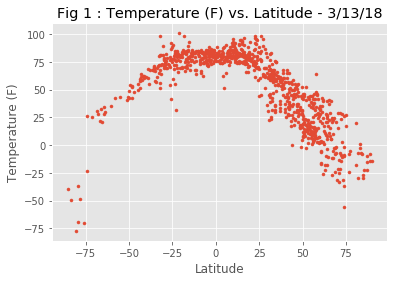

In [9]:
# Temperature vs Latitude
plt.scatter(city_df2["Lat"],city_df2["Temperature"],marker=".")
plt.title("Fig 1 : Temperature (F) vs. Latitude - 3/13/18")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("1_Temp_v_Lat.png")
plt.show()

# Fig 2 : Humidity (%) vs. Latitude - 3/13/18

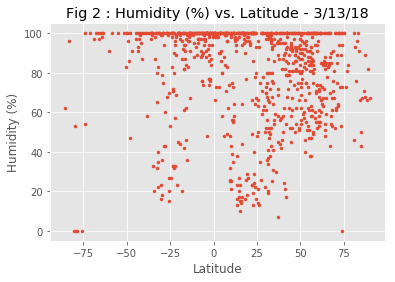

In [10]:
# Humidity vs Latitude
plt.scatter(city_df2["Lat"],city_df2["Humidity"],marker =".")
plt.title("Fig 2 : Humidity (%) vs. Latitude - 3/13/18")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("2_Humidity_v_Lat.png")
plt.show()

# Fig 3: Cloudiness (%) vs. Latitude - 3/13/18

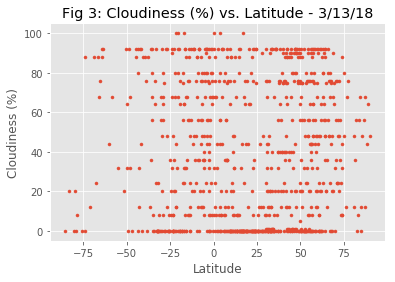

In [11]:
# Cloudiness vs Latitude 
plt.scatter(city_df2["Lat"],city_df2["Clouds"],marker =".")
plt.title("Fig 3: Cloudiness (%) vs. Latitude - 3/13/18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("3_Clouds_v_Lat.png")
plt.show()

# Fig 4: Wind Speed (mph) vs. Latitude - 3/13/18

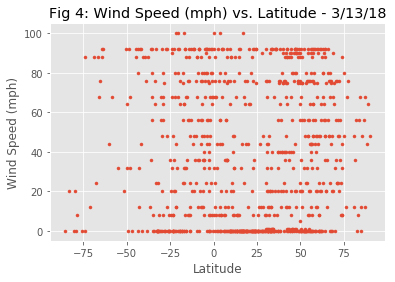

In [12]:
# Wind Speed vs Latitude 
plt.scatter(city_df2["Lat"],city_df2["Clouds"],marker =".")
plt.title("Fig 4: Wind Speed (mph) vs. Latitude - 3/13/18")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("4_Wind_v_Lat.png")
plt.show()